In [ ]:
#!pip install -r requirements.txt

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
appointments = pd.read_csv('appointment_data.csv')
#appointments = pd.read_csv('appointment_data.csv', na_values=['', ' '])
#appointments = appointments.replace(['', ' '], [np.nan, np.nan])

In [9]:
appointments.shape

(88421, 14)

In [10]:
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88421 entries, 0 to 88420
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No-show         88421 non-null  object 
 1   PatientId       88421 non-null  float64
 2   AppointmentID   88421 non-null  int64  
 3   Gender          88421 non-null  object 
 4   ScheduledDay    88421 non-null  object 
 5   AppointmentDay  88421 non-null  object 
 6   Age             88421 non-null  int64  
 7   Neighbourhood   88421 non-null  object 
 8   Scholarship     88421 non-null  int64  
 9   Hipertension    88421 non-null  int64  
 10  Diabetes        88421 non-null  int64  
 11  Alcoholism      88421 non-null  int64  
 12  Handcap         88421 non-null  int64  
 13  SMS_received    88421 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 9.4+ MB


In [11]:
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,8.842100e+04,8.842100e+04,88421.000000,88421.000000,88421.000000,88421.000000,88421.000000,88421.000000,88421.000000
mean,1.484798e+14,5.675391e+06,37.124631,0.099230,0.198064,0.072324,0.030638,0.022393,0.321553
std,2.570830e+14,7.133018e+04,23.104321,0.298972,0.398543,0.259026,0.172335,0.162529,0.467075
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.166843e+12,5.640477e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.212196e+13,5.680756e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.464814e+13,5.725565e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790481e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
appointments.head(10)

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,1.328492e+12,5687610,F,2016-05-11T16:00:16Z,2016-05-19T00:00:00Z,25,MATA DA PRAIA,0,0,0,0,0,0
1,No,3.881869e+14,5694484,M,2016-05-13T08:41:27Z,2016-05-17T00:00:00Z,62,FRADINHOS,0,0,0,0,0,0
2,Yes,9.118992e+12,5500939,F,2016-03-22T11:09:38Z,2016-05-09T00:00:00Z,65,JARDIM CAMBURI,0,0,0,0,0,0
3,No,1.843618e+14,5639080,M,2016-04-29T08:42:15Z,2016-04-29T00:00:00Z,41,MARIA ORTIZ,0,0,0,0,0,0
4,No,5.783198e+13,5671566,M,2016-05-06T18:47:52Z,2016-05-09T00:00:00Z,61,MARUÍPE,0,1,0,1,0,0
5,No,6.516246e+13,5600056,F,2016-04-19T09:52:22Z,2016-05-16T00:00:00Z,11,DO QUADRO,1,0,0,0,0,0
6,No,6.559800e+12,5640931,M,2016-04-29T11:44:39Z,2016-05-04T00:00:00Z,45,CRUZAMENTO,0,0,0,0,0,1
7,No,1.432925e+12,5730450,M,2016-05-24T08:37:44Z,2016-06-07T00:00:00Z,9,MÁRIO CYPRESTE,0,0,0,0,0,1
8,No,9.741488e+14,5771325,M,2016-06-03T12:24:24Z,2016-06-03T00:00:00Z,79,SOLON BORGES,0,0,0,0,0,0
9,No,5.458152e+12,5671279,M,2016-05-06T16:09:35Z,2016-05-10T00:00:00Z,60,TABUAZEIRO,0,1,0,0,0,1


Ci sono molti più pazienti che non si presentano all'appuntamento

Text(0.5, 1.0, 'showed up patients')

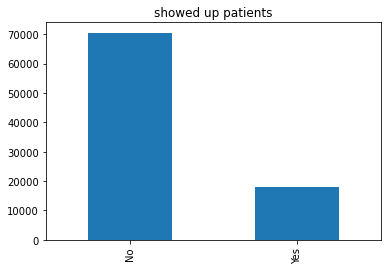

In [15]:
appointments['No-show'].value_counts().plot(kind='bar').set_title('showed up patients')

Controllo i possibili valori assunti dalle feature, ricordando lo shape del dataset

In [21]:
appointments.shape

(88421, 14)

In [20]:
appointments.nunique()

No-show               2
PatientId         54105
AppointmentID     88421
Gender                2
ScheduledDay      83840
AppointmentDay       27
Age                 103
Neighbourhood        81
Scholarship           2
Hipertension          2
Diabetes              2
Alcoholism            2
Handcap               5
SMS_received          2
dtype: int64

Gli ID dei pazienti non sono univoci. E' tuttavia consentito che un paziente prenoti più visite

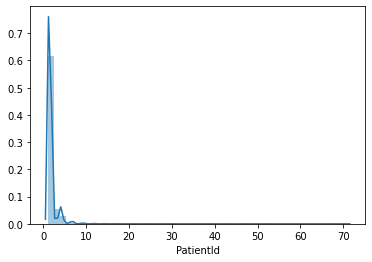

In [18]:
sns.distplot(appointments.PatientId.value_counts())

In [19]:
appointments.PatientId.value_counts()

8.221459e+14    71
9.963767e+10    67
2.688613e+13    61
3.353478e+13    53
6.264199e+12    53
                ..
2.944721e+13     1
1.228648e+13     1
5.176346e+14     1
4.549555e+14     1
9.917836e+12     1
Name: PatientId, Length: 54105, dtype: int64

Ci sono alcuni ID dei pazienti che non sono formattati correttamente (5 rows)

In [26]:
appointments.PatientId.apply(float.is_integer).sum()

88416

In [27]:
appointments[appointments.PatientId.apply(float.is_integer) == False]

,No-show,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
29449,No,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0
49021,No,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0
52650,No,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0
75314,No,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1
79477,No,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0
